In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

from sqlalchemy import create_engine
!pip install psycopg2

You should consider upgrading via the 'c:\python39\python.exe -m pip install --upgrade pip' command.


In [2]:
engine = create_engine(f'postgresql://postgres:Blome00228@@localhost:5433/sql_c')
connection = engine.connect()

In [3]:
# Query All Records in the the Table salaries
salaries = pd.read_sql("SELECT * FROM salary", connection)
salaries.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


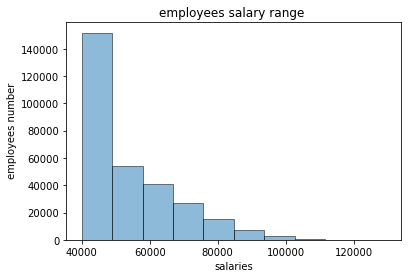

In [4]:
# Histogramm for employees salaries
x = salaries["salary"]
plt.hist(x, alpha=0.5, histtype='bar', ec='black')
plt.title ("employees salary range ")
plt.xlabel ("salaries")
plt.ylabel (" employees number")
plt.show()


In [5]:
#Create a bar chart of average salary by title
 #display employees to pd
employes= pd.read_sql("SELECT * FROM employees", connection)
employes.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18


In [6]:
 #display a title to pd
title= pd.read_sql("SELECT * FROM titles", connection)
title.head()

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer


In [7]:
# merging employees and salaries 
emp = employes.merge(salaries, on = 'emp_no')
emp.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07,53422
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21,48973
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,40000
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18,40000


In [8]:
 #merging title to employees and salaries
employees_title = emp.merge(title,left_on = 'emp_title_id',right_on='title_id')
employees_title.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary,title_id,title
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000,s0001,Staff
1,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,40000,s0001,Staff
2,273487,s0001,1957-04-14,Christoph,Parfitt,M,1991-06-28,56087,s0001,Staff
3,246449,s0001,1958-03-23,Subbu,Bultermann,F,1988-03-25,87084,s0001,Staff
4,48085,s0001,1964-01-19,Venkatesan,Gilg,M,1993-06-28,63016,s0001,Staff


In [9]:
#display salary and title into a small dataframe
title_salary = employees_title[["title", "salary"]]
title_salary.head()

,title,salary
0,Staff,40000
1,Staff,40000
2,Staff,56087
3,Staff,87084
4,Staff,63016


In [10]:
#the average of salary
avg_salary = title_salary.groupby("title")["salary"].mean()
avg_salary

title
Assistant Engineer    48564.434447
Engineer              48535.336511
Manager               51531.041667
Senior Engineer       48506.799871
Senior Staff          58550.172704
Staff                 58465.382850
Technique Leader      48582.896092
Name: salary, dtype: float64

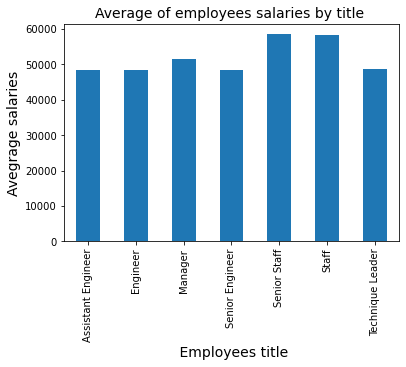

In [11]:
#Create a bar chart of average salary by title.
avg_salary.plot.bar()
plt.title ("Average of employees salaries by title ", fontsize=14)
plt.xlabel (" Employees title", fontsize=14)
plt.ylabel ("Avegrage salaries", fontsize=14)
plt.show()

In [12]:
connection.close()